In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset link - https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

Source:

Source
1. C. Okan Sakar
Department of Computer Engineering, Faculty of
Engineering and Natural Sciences, Bahcesehir University,
34349 Besiktas, Istanbul, Turkey

2. Yomi Kastro
Inveon Information Technologies Consultancy and Trade,
34335 Istanbul, Turkey


Data Set Information:

The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.


Attribute Information:

The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.




In [242]:
#load the csv file
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [243]:
df.shape

(12330, 18)

In [244]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [245]:
df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [246]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [248]:
unique_values = df.nunique(axis=0)
print(unique_values)

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64


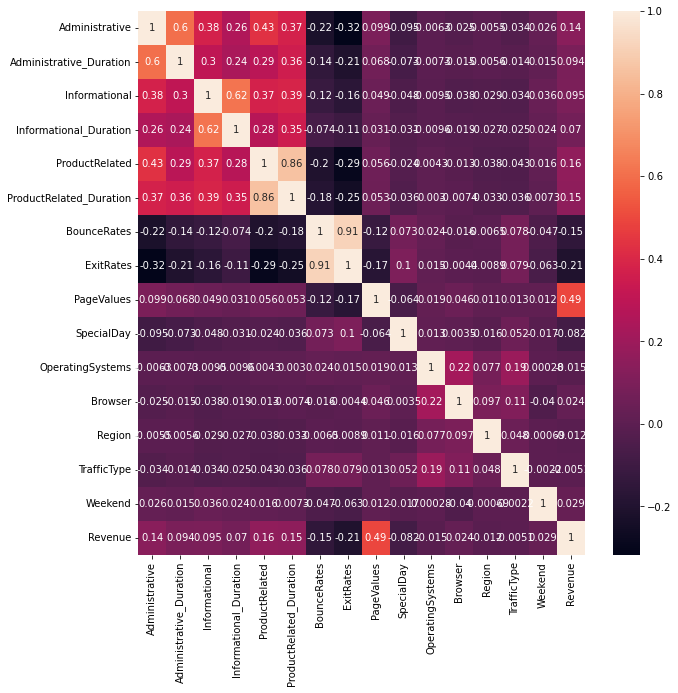

In [249]:
#create a heatmap to see the correlation between the variables
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [250]:
#print columns 
print(df.columns)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


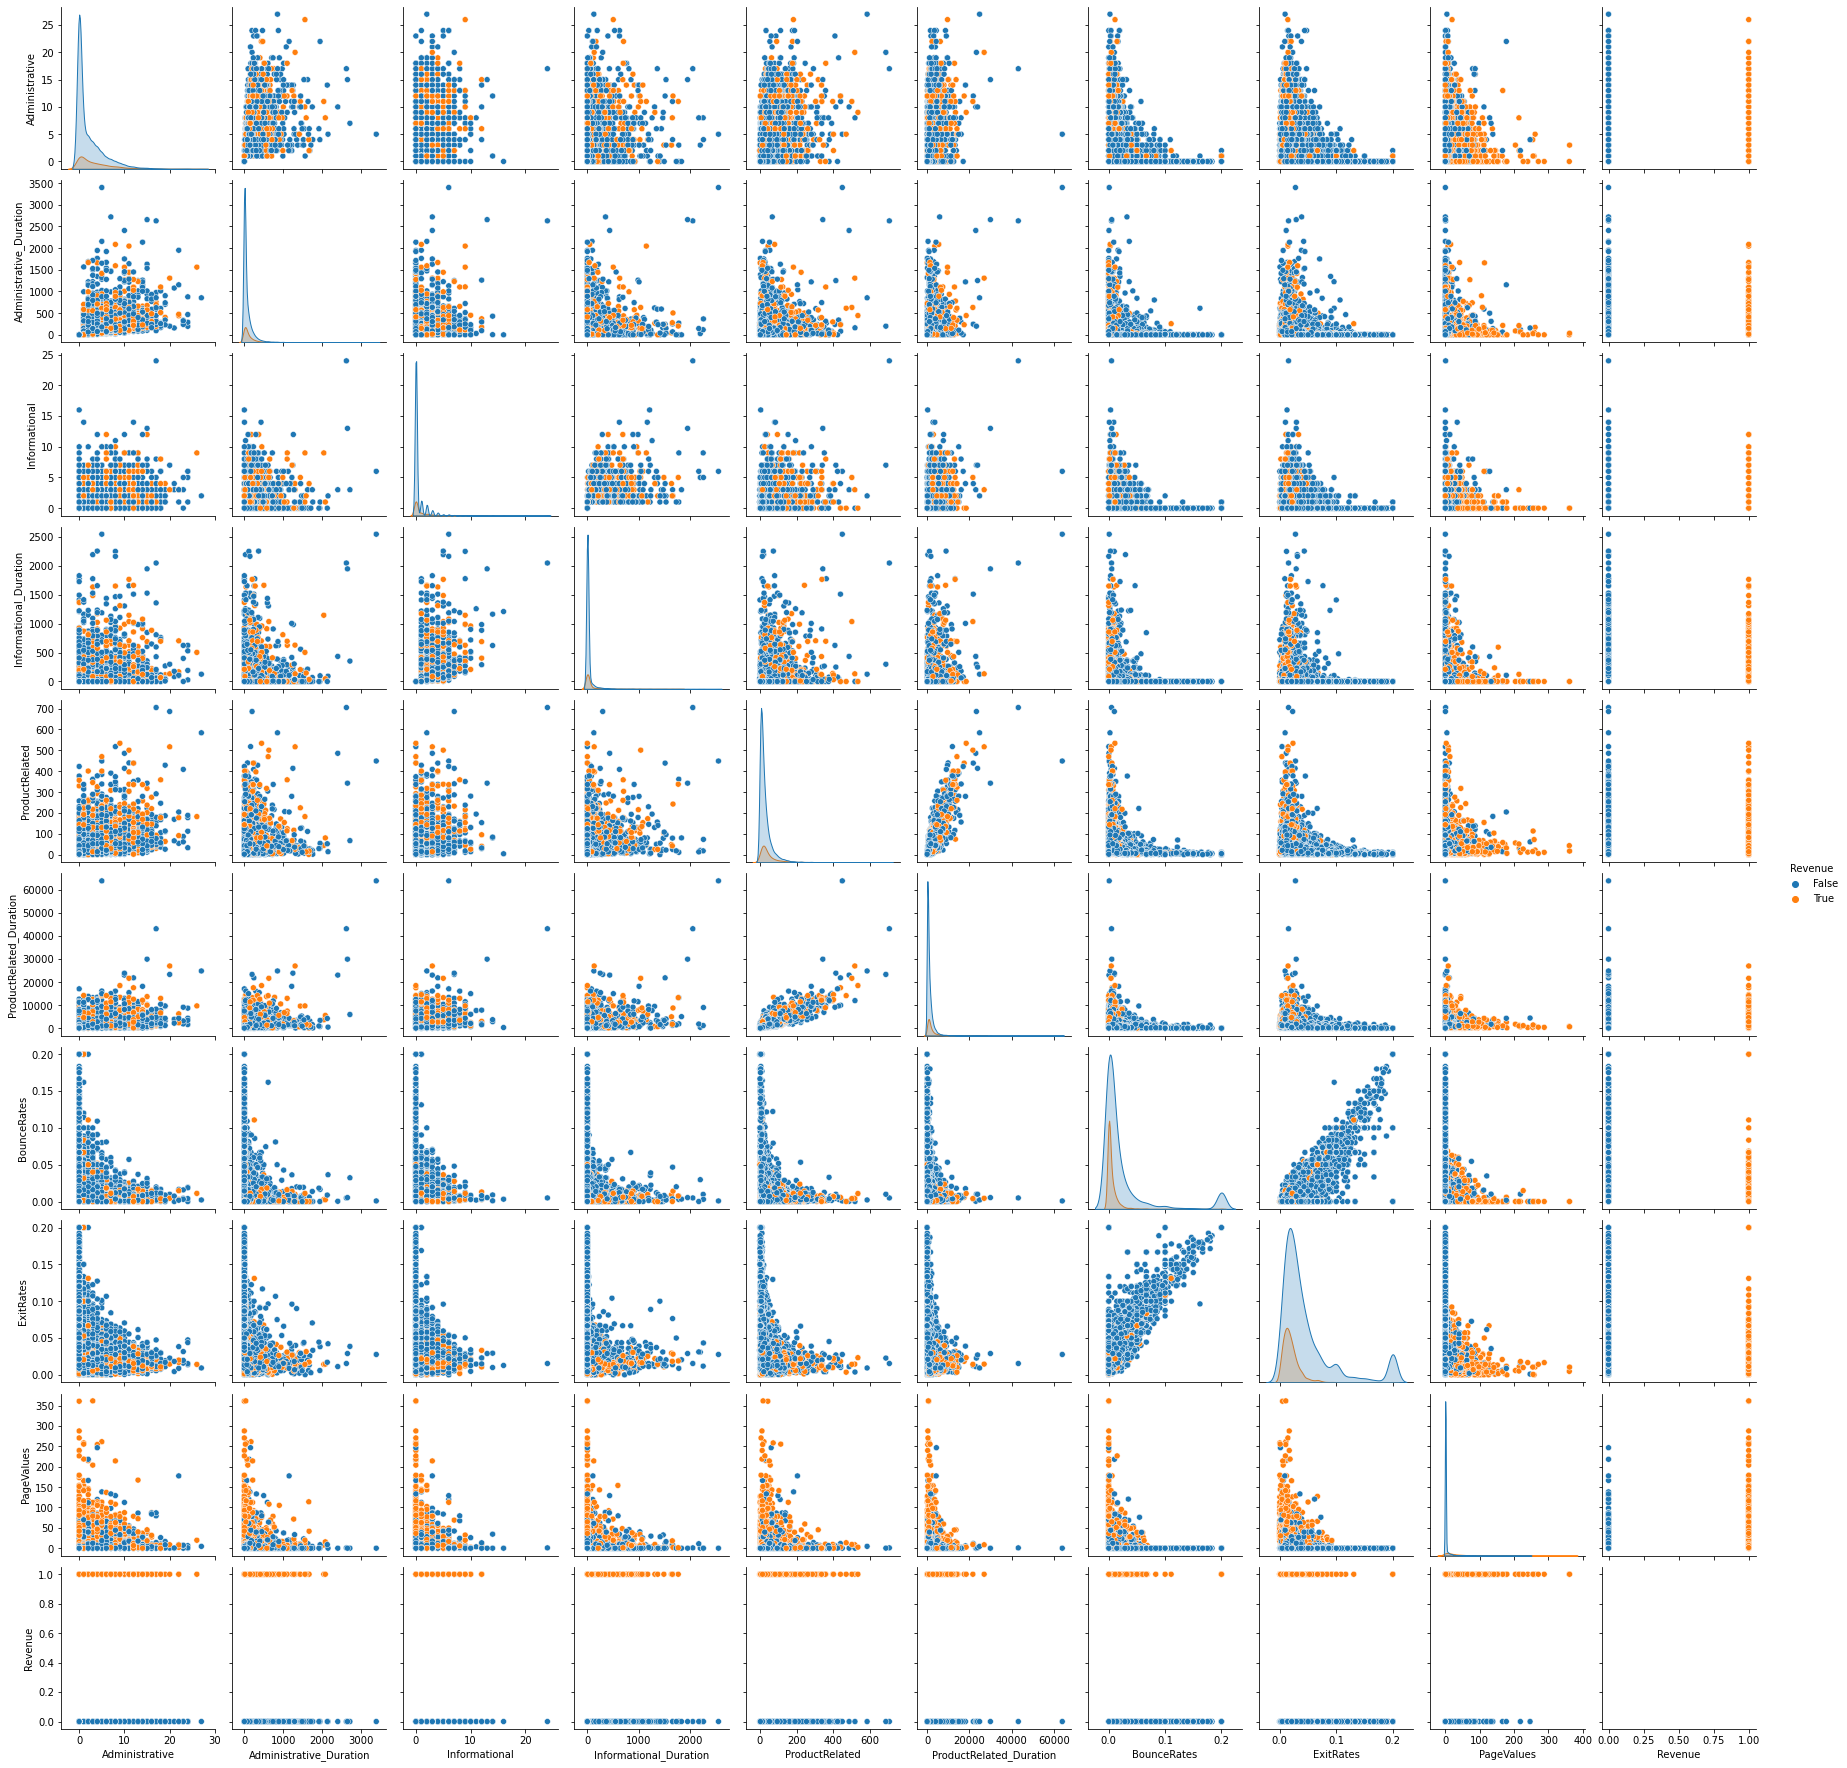

In [251]:
#create a pairplot to see the relationship between the variables with hue as Revenue
sns.pairplot(df, hue='Revenue', 
vars=['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated', 
'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues','Revenue'])
plt.show()

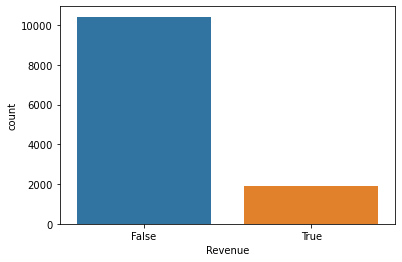

In [252]:
#visualize the data using revenue
sns.countplot(x='Revenue', data=df)
plt.show()

In [253]:
#convert the Weekend and Revenue columns to int as they are boolean
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [254]:
#print the unique values of visitor type
df['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

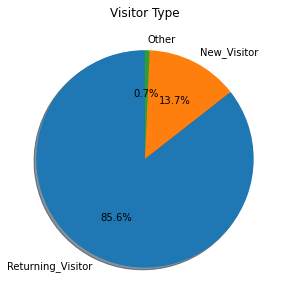

In [255]:
#create a piechart to visualize the visitor type using plot.pie
plt.figure(figsize=(5,5))
pie = df['VisitorType'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, startangle=90)
pie.figure.patch.set_facecolor('white')
plt.title('Visitor Type')
plt.ylabel('')
plt.show()


/Users/sahil/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


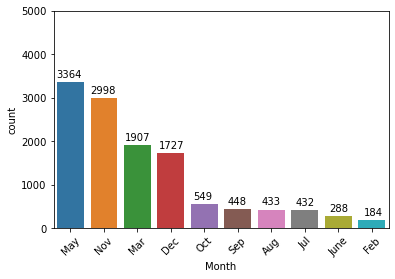

In [256]:
Monthly = df['Month'].value_counts()
sns.countplot(df['Month'], order=Monthly.index)
xval = -0.42
plt.xticks(rotation=45)
plt.ylim(0, 5000)

for i, v in Monthly.items():
    plt.text(x = xval,y = v+100, s = str(v))
    xval += 1.02

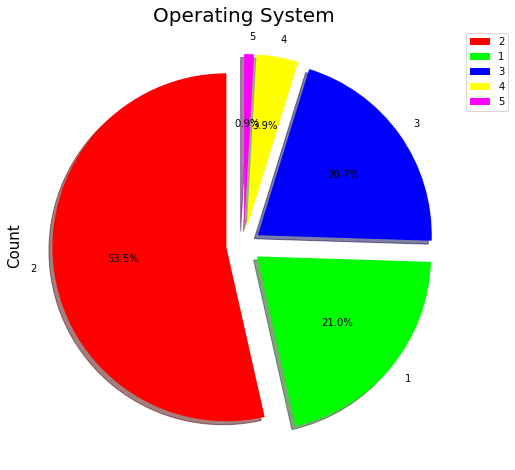

In [257]:
#pie chart of Operating System
df['OperatingSystems'] = df['OperatingSystems'].replace([5,6,7,8],5)
plot = df['OperatingSystems'].value_counts().plot.pie(autopct='%1.1f%%' ,shadow=True, startangle=90,explode=[0.1,0.1,0.1,0.1,0.1],  colors=['#ff0000','#00ff00','#0000ff','#ffff00','#ff00ff'], figsize=(8,8))
plot.figure.patch.set_facecolor('white')
plt.title('Operating System', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

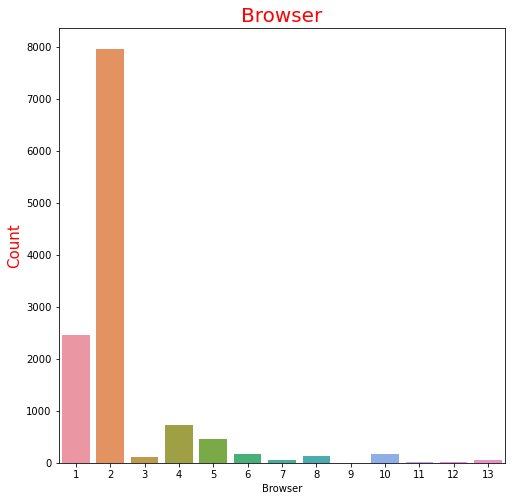

In [258]:
#plot Browser
plt.figure(figsize=(8,8))
sns.countplot(x='Browser', data=df)
plt.title('Browser', fontsize=20, color='r')
plt.ylabel('Count', fontsize=15, color='red')
plt.show()

______

# Linear Classifications

## Regression

In [259]:
# Removing unneccessary columns from data: shopping_clean
df_clean = df.drop(['Month','Browser','OperatingSystems','Region','TrafficType','Weekend'], axis=1)
df_clean.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,VisitorType,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Returning_Visitor,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Returning_Visitor,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Returning_Visitor,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Returning_Visitor,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Returning_Visitor,0


In [260]:
#create a new df called df_reg by dropping the VisitorType column
df_reg = df_clean.drop(['VisitorType'], axis=1)
df_reg.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,0


In [261]:
#from df_reg, perform linear regression on the dependent variable 'Revenue' and independent variable 'VisitorType'
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#split the data into train and test
X_reg = df_reg.drop(['Revenue'], axis=1)
y_reg = df_reg['Revenue']
X_reg_Train , X_reg_Test , y_reg_Train , y_reg_Test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

#train the model
reg = LinearRegression()
reg.fit(X_reg_Train, y_reg_Train)


LinearRegression()

In [262]:
#predict the test set results
y_reg_pred = reg.predict(X_reg_Test)
y_reg_pred

array([0.12898254, 0.18745944, 0.21192855, ..., 0.1643965 , 0.2706085 ,
       0.04400164])

In [263]:
#compute the mean squared error and the r2 score
mse = mean_squared_error(y_reg_Test, y_reg_pred)
r2 = r2_score(y_reg_Test, y_reg_pred)
print(mse)
print(r2)

0.10212553257737254
0.26469616544291774


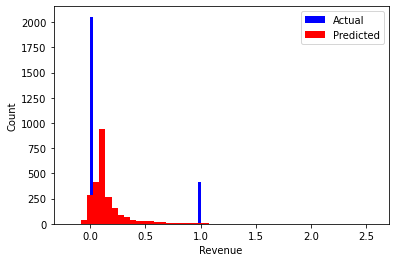

In [264]:
#plot the results
plt.hist(y_reg_Test, bins=50, color='blue', label='Actual')
plt.hist(y_reg_pred, bins=50, color='red', label='Predicted')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.legend()
plt.show()

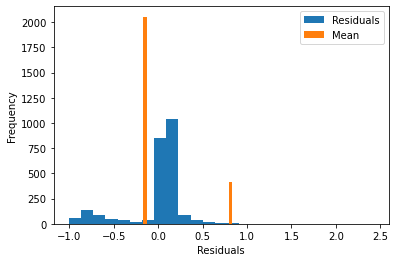

In [265]:
#plot the residuals histogram
plt.hist(y_reg_pred - y_reg_Test, bins=25)
plt.hist(y_reg_Test - y_reg_Test.mean(), bins=25)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend(['Residuals', 'Mean'])
plt.show()

## Support Vector Machine Algorithm

In [266]:
#SVM Regression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

#use the same split as above
#X_reg_Train , X_reg_Test , y_reg_Train , y_reg_Test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

#train the model
reg = SVR(kernel='rbf', C=1e3, gamma=0.1)
reg.fit(X_reg_Train, y_reg_Train)

#predict the test set results
y_reg_pred = reg.predict(X_reg_Test)
y_reg_pred



array([0.26427817, 0.26427817, 0.26427817, ..., 0.26427817, 0.26427817,
       0.08658994])

mse 0.1529999484898086
r2 -0.1015996291266219


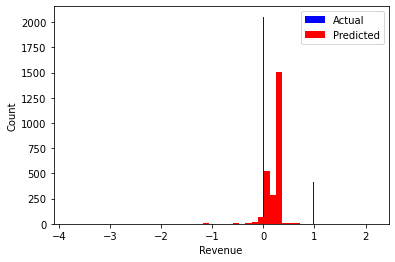

In [267]:
#compute the mean squared error and the r2 score
mse = mean_squared_error(y_reg_Test, y_reg_pred)
r2 = r2_score(y_reg_Test, y_reg_pred)
print("mse", mse)
print("r2", r2)

#plot the results
plt.hist(y_reg_Test, bins=50, color='blue', label='Actual')
plt.hist(y_reg_pred, bins=50, color='red', label='Predicted')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.legend()
plt.show()

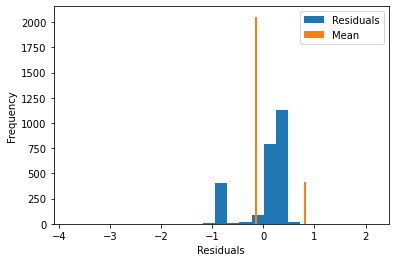

In [268]:
#plot the residuals histogram
plt.hist(y_reg_pred - y_reg_Test, bins=25)
plt.hist(y_reg_Test - y_reg_Test.mean(), bins=25)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend(['Residuals', 'Mean'])
plt.show()

# Non Linear Classification

## label and one hot encode the data

In [269]:

visitor_labels = pd.get_dummies(df_clean['VisitorType'], drop_first=True,prefix='VisitorType')
df_merge = pd.concat([df_clean, visitor_labels], axis=1).drop(['VisitorType'], axis=1)
df_merge.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,0,0,1


In [270]:
#splitting the test and train data
from sklearn.model_selection import train_test_split
X = df_merge.drop(['Revenue'], axis=1)
y = df_merge['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## KNN

In [271]:
#knn model
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

#predict the test set results
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

[[3089   35]
 [ 469  106]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.92      3124
           1       0.75      0.18      0.30       575

    accuracy                           0.86      3699
   macro avg       0.81      0.59      0.61      3699
weighted avg       0.85      0.86      0.83      3699



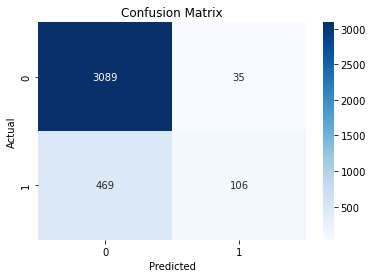

In [272]:
#confusion matrix and classification report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

#plot the results from the confusion matrix and classification report
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Need to change the variable names from below pooora taapa hai

No Skill: ROC AUC=0.500
KNN: ROC AUC=0.776


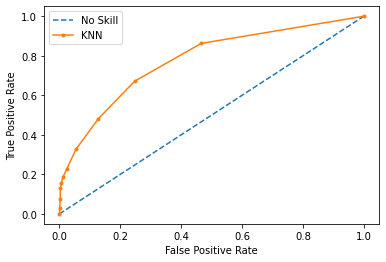

In [273]:
#roc curve and auc score for knn
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

ns_probs = [0 for _ in range(len(y_test))]
lr_probs = knn.predict_proba(X_test)[:,1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Naaive bayes

In [274]:
#naiive bayes model
from sklearn.naive_bayes import GaussianNB
nbc_model = GaussianNB()
nbc_model.fit(X_train, y_train)

#prediction on test data
y_predict = nbc_model.predict(X_test)
y_predict_train = nbc_model.predict(X_train)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[2839  285]
 [ 275  300]]


In [275]:
#comparing the prediction to response values
from sklearn.metrics import accuracy_score
from sklearn import metrics
accuracy_score(y_test, y_predict)
print("GNB model accuracy(in %):", round(metrics.accuracy_score(y_test, y_predict)*100,2))

GNB model accuracy(in %): 84.86


In [276]:
print("GNB model accuracy(in %):", round(metrics.accuracy_score(y_train, y_predict_train)*100,2))

GNB model accuracy(in %): 84.79


In [277]:
#calculating the best ROC AUC score for the models
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

#calculating the ROC AUC score for the naive bayes model
nbc_roc_auc = roc_auc_score(y_test, y_predict)
print("ROC AUC score for the naive bayes model:", round(nbc_roc_auc*100,2))

ROC AUC score for the naive bayes model: 71.53


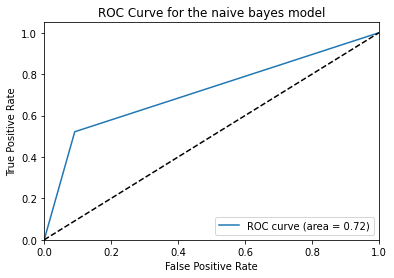

In [278]:
#roc curve for the naive bayes model
nbc_fpr, nbc_tpr, nbc_thresholds = metrics.roc_curve(y_test, y_predict)
nbc_roc_auc = metrics.auc(nbc_fpr, nbc_tpr)
plt.figure()
plt.plot(nbc_fpr, nbc_tpr, label='ROC curve (area = %0.2f)' % nbc_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for the naive bayes model')
plt.legend(loc="lower right")
plt.show()

In [279]:
#calculating log loss for the naive bayes model
from sklearn.metrics import log_loss
log_loss(y_test, y_predict)
print("Log loss for the naive bayes model:", round(log_loss(y_test, y_predict),2))

Log loss for the naive bayes model: 5.23


In [280]:
#calculating the precision, recall, f1-score and support for the naive bayes model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3124
           1       0.51      0.52      0.52       575

    accuracy                           0.85      3699
   macro avg       0.71      0.72      0.71      3699
weighted avg       0.85      0.85      0.85      3699



## Random Forest

In [281]:
#random forest model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#prediction on test data
y_predict = rf_model.predict(X_test)
y_predict_train = rf_model.predict(X_train)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[2995  129]
 [ 264  311]]


In [282]:
#comparing the prediction to response values
from sklearn.metrics import accuracy_score
from sklearn import metrics
metrics.accuracy_score(y_test, y_predict)
print("Random forest model accuracy(in %):", round(metrics.accuracy_score(y_test, y_predict)*100,2))

Random forest model accuracy(in %): 89.38


In [283]:
print("Random forest model accuracy(in %):", round(metrics.accuracy_score(y_train, y_predict_train)*100,2))

Random forest model accuracy(in %): 99.97


In [284]:
#calculating the ROC AUC score for the random forest model
rf_roc_auc = roc_auc_score(y_test, y_predict)
print("ROC AUC score for the random forest model:", round(rf_roc_auc*100,2))

ROC AUC score for the random forest model: 74.98


ROC AUC score for the random forest model: 74.98


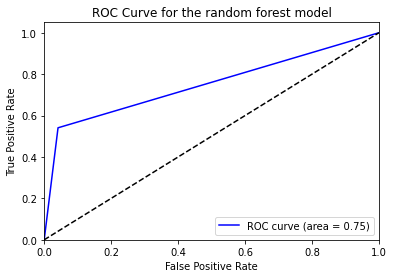

In [285]:
#calculating the ROC AUC score for the random forest model
rf_roc_auc = roc_auc_score(y_test, y_predict)
print("ROC AUC score for the random forest model:", round(rf_roc_auc*100,2))

#roc curve for the random forest model
rf_fpr, rf_tpr, rf_thresholds = metrics.roc_curve(y_test, y_predict)
rf_roc_auc = metrics.auc(rf_fpr, rf_tpr)


plt.figure()
plt.plot(rf_fpr, rf_tpr,'b', label='ROC curve (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for the random forest model')
plt.legend(loc="lower right")
plt.show()

In [286]:
#calculating log loss for the random forest model
from sklearn.metrics import log_loss
log_loss(y_test, y_predict)
print("Log loss for the random forest model:", round(log_loss(y_test, y_predict),2))

Log loss for the random forest model: 3.67


In [287]:
#calculating the precision, recall, f1-score and support for the random forest model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3124
           1       0.71      0.54      0.61       575

    accuracy                           0.89      3699
   macro avg       0.81      0.75      0.78      3699
weighted avg       0.89      0.89      0.89      3699



# Extra tree model

In [288]:
#extra tree model
from sklearn.ensemble import ExtraTreesClassifier
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_model.fit(X_train, y_train)

#prediction on test data
y_predict = et_model.predict(X_test)
y_predict_train = et_model.predict(X_train)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[3016  108]
 [ 316  259]]


In [289]:
#comparing the prediction to response values
from sklearn.metrics import accuracy_score
from sklearn import metrics
metrics.accuracy_score(y_test, y_predict)
print("Extra tree model accuracy(in %):", round(metrics.accuracy_score(y_test, y_predict)*100,2))

Extra tree model accuracy(in %): 88.54


In [290]:
print("Extra tree model accuracy(in %):", round(metrics.accuracy_score(y_train, y_predict_train)*100,2))

Extra tree model accuracy(in %): 99.98


In [291]:
#calculating the ROC AUC score for the extra tree model
et_roc_auc = roc_auc_score(y_test, y_predict)
print("ROC AUC score for the extra tree model:", round(et_roc_auc*100,2))

ROC AUC score for the extra tree model: 70.79


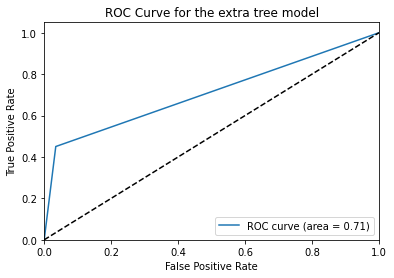

In [292]:
#roc curve for the extra tree model
et_fpr, et_tpr, et_thresholds = roc_curve(y_test, y_predict)
et_roc_auc = auc(et_fpr, et_tpr)
plt.figure()
plt.plot(et_fpr, et_tpr, label='ROC curve (area = %0.2f)' % et_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for the extra tree model')
plt.legend(loc="lower right")
plt.show()

In [293]:
#calculating log loss for the extra tree model
from sklearn.metrics import log_loss
log_loss(y_test, y_predict)
print("Log loss for the extra tree model:", round(log_loss(y_test, y_predict),2))

Log loss for the extra tree model: 3.96


In [294]:
#calculating the precision, recall, f1-score and support for the extra tree model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.97      0.93      3124
           1       0.71      0.45      0.55       575

    accuracy                           0.89      3699
   macro avg       0.81      0.71      0.74      3699
weighted avg       0.87      0.89      0.87      3699



# ye neeche ka galat hai...change karna hai

In [295]:
#stratifying the data for the cross validation
from sklearn.model_selection import StratifiedKFold
X_train_strat, X_test_strat, y_train_strat, y_test_strat = train_test_split(X, y,stratify=y, test_size=.2, random_state=2, shuffle=True)

In [296]:
#Fit GNB model to the stratified data
from sklearn.naive_bayes import GaussianNB
gnb_strat = GaussianNB()
gnb_strat.fit(X_train_strat, y_train_strat)
y_predict = gnb_strat.predict(X_test_strat)

#prediction using test data and gnb model
y_predict_strat = gnb_strat.predict(X_test)

#comparing the predicted values with the actual values
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict_strat)
print("Accuracy score for the naive bayes model:", round(accuracy_score(y_test, y_predict_strat)*100,2))


Accuracy score for the naive bayes model: 84.64


In [297]:
#fit the random forest model to the stratified data
from sklearn.ensemble import RandomForestClassifier
rf_strat = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rf_strat.fit(X_train_strat, y_train_strat)
y_predict = rf_strat.predict(X_test_strat)

#prediction using test data and random forest model
y_predict_strat = rf_strat.predict(X_test)

#comparing the predicted values with the actual values
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict_strat)
print("Accuracy score for the random forest model:", round(accuracy_score(y_test, y_predict_strat)*100,2))

Accuracy score for the random forest model: 84.46


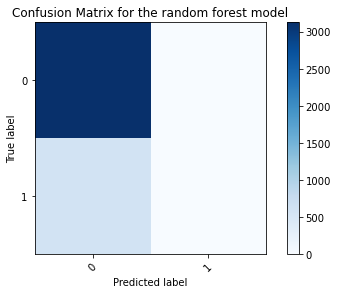

In [298]:
#plotting the confusion matrix for the random forest model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict_strat)
plt.figure()
plt.imshow(confusion_matrix(y_test, y_predict_strat), interpolation='nearest', cmap=plt.cm.Blues) 
plt.title("Confusion Matrix for the random forest model")
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [299]:
#fit the extra tree model to the stratified data
from sklearn.ensemble import ExtraTreesClassifier
et_strat = ExtraTreesClassifier(n_estimators=100, max_depth=2, random_state=0)
et_strat.fit(X_train_strat, y_train_strat)
y_predict = et_strat.predict(X_test_strat)

#prediction using test data and extra tree model
y_predict_strat = et_strat.predict(X_test)

#comparing the predicted values with the actual values
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict_strat)
print("Accuracy score for the extra tree model:", round(accuracy_score(y_test, y_predict_strat)*100,2))


Accuracy score for the extra tree model: 84.46


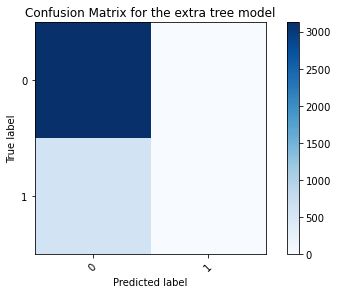

In [300]:
#plotting the confusion matrix for the extra tree model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict_strat)
plt.figure()
plt.imshow(confusion_matrix(y_test, y_predict_strat), interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix for the extra tree model")
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



In [301]:
#split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=2, shuffle=True)
